In [1]:
import deep_predictor
from collections.abc import Mapping
import torch
import scanpy as sc

Global seed set to 0
/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
import scipy.stats as ss
import numpy as np
import scipy.stats as ss
sc.set_figure_params(dpi=250, color_map='viridis')  # low dpi (dots per inch) yields small inline figures
import pandas as pd

In [3]:
import numpy as np
import pandas as pd

In [4]:
adata = sc.read("/home/gaurav/Gaurav/Berlin/Deep_Learning/Experiment/PCA_UMAP/VAE_models/VAE_models/normalised_model/farrel_normalised.h5ad")
#sc.pp.log1p(adata)

In [5]:
#Training Data
#Meso/Endo
segments = [74,71,3,34,12,75,62,52,58,73,17,26,76,5,18]
training_data = adata[adata.obs['segment'] == 78]
training_data = training_data[training_data.obs['HPF'] == 5.3]
for segment in segments:
    segment_data = adata[adata.obs['segment'] == segment]
    segment_data = segment_data[segment_data.obs['HPF'] == 12]
    training_data = training_data.concatenate(segment_data)

training_data.obs["cells"] = "Training data"

/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In 

In [87]:
#Lambda = np.shape(training_data.X)[1]
#zebra_obj = deep_predictor.DeepPredictor(training_data,latent_dim=100,hidden_layers=[800,800],workers=8,parameters=[0,0,0,Lambda,1],likelihood="nb",batch_size=100)
zebra_obj = deep_predictor.DeepPredictor(training_data,latent_dim=100,hidden_layers=[800,800],workers=8,parameters=[0,0,0,1,1],likelihood="nb",batch_size=100,flow_length = 32)

In [88]:
#zebra_obj.reload_model(path="/home/gaurav/Gaurav/Berlin/Deep_Learning/Project/models/NB_KL/withouttestdata/zebra_ecto_trained_00011_highDimby_without_testdata/model_lambda_batch_100_KL.pt") # NB + KL
zebra_obj.reload_model(path="/home/gaurav/Gaurav/Berlin/Deep_Learning/Project/models/NB_MMD/withouttestdata/zebra_meso_endo_trained_00011_highDimby_without_testdata/model.pt") # NB + MMD

In [8]:
adata_test = 0
Segments = [61,19,64,2,59,50,56,16,60,1,10,55,57,53]
Real_data = adata[adata.obs['segment'] == 8]
Real_data.obs["cells"] = "Real data"
seg_data = 0
for segment in Segments:
    seg_data = adata[adata.obs['segment'] == segment]
    seg_data = seg_data[seg_data.obs['HPF'] == 12]
    seg_data.obs["cells"] = "Real data"
    Real_data = Real_data.concatenate(seg_data)

temp_data = adata[adata.obs['segment'] == 72]
Test_data = temp_data[temp_data.obs['HPF'] == 5.3]
Test_data.obs["cells"] = "Test data"

adata_test = Real_data.concatenate(Test_data)

/tmp/ipykernel_24498/4189943973.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  Real_data.obs["cells"] = "Real data"
/tmp/ipykernel_24498/4189943973.py:9: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  seg_data.obs["cells"] = "Real data"
/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/tmp/ipykernel_24498/4189943973.py:9: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  seg_data.obs["cells"] = "Real data"
/home/gaurav/anaconda3/envs/project/lib/python3.10/

/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [89]:
zebra_obj.runFlows(5.3,12,"HPF",adata_test)

In [90]:
zebra_obj.trainFlows(iterations=300)

Loss (it. 0) : 23.026854
Loss (it. 50) : 14.716658
Loss (it. 100) : 0.442753
Loss (it. 150) : -9.691610
Loss (it. 200) : -17.236900
Loss (it. 250) : -23.170380


In [91]:
adata_meso_endo_forward,px_scale,theta,px_rate = zebra_obj.predict(adata_test,5.3,12,"HPF")


/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [92]:
#adata_linear = zebra_obj._Transitions("linear")
#adata_radial = zebra_obj._Transitions("radial")
#adata_cells = adata_linear[adata_linear.obs["cells"] != "Test data"]
#adata_cells = adata_cells[adata_cells.obs["cells"] != "Real data"]
#adata_cells = adata_cells[adata_cells.obs["cells"] != "Predicted data"]
#adata_cells = adata_cells.concatenate(adata_radial)
#adata_cells = adata_cells.concatenate(adata_radial)

In [93]:
#sc.tl.pca(adata_cells)
#real_ = adata_cells[adata_cells.obs["cells"] == "Real data"]
#test_ = adata_cells[adata_cells.obs["cells"] == "Test data"]
#for i in range(1,11):
#    print(i)
#    cells = "Predicted data" + str(i) + " linear"
#    adata_pred = adata_cells[adata_cells.obs["cells"] == cells]
#    adata_pred = real_.concatenate(test_,adata_pred)
#    sc.pl.pca(adata_pred, color="cells",size=50,alpha = 0.6,palette=["#1f77b4","grey","darkgrey"])
#real_ = adata_cells[adata_cells.obs["cells"] == "Real data"]
#test_ = adata_cells[adata_cells.obs["cells"] == "Test data"]
#for i in range(1,11):
#    cells = "Predicted data" + str(i) + " radial"
#    adata_pred = adata_cells[adata_cells.obs["cells"] == cells]
#    adata_pred = real_.concatenate(test_,adata_pred)
#    sc.pl.pca(adata_pred, color="cells",size=50,alpha = 0.6,palette=["#1f77b4","grey","darkgrey"])

In [94]:
adata_ = zebra_obj.Transition_state()

/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [95]:
adata_wtl = adata_[adata_.obs["cells"] != "Predicted data Linear"]
adata_wtl = adata_wtl[adata_wtl.obs["cells"] != "Predicted data"]
adata_ = adata_wtl.concatenate(adata_[adata_.obs["cells"] =="Predicted data"],adata_[adata_.obs["cells"] =="Predicted data Linear"])

/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [96]:
sc.tl.pca(adata_)

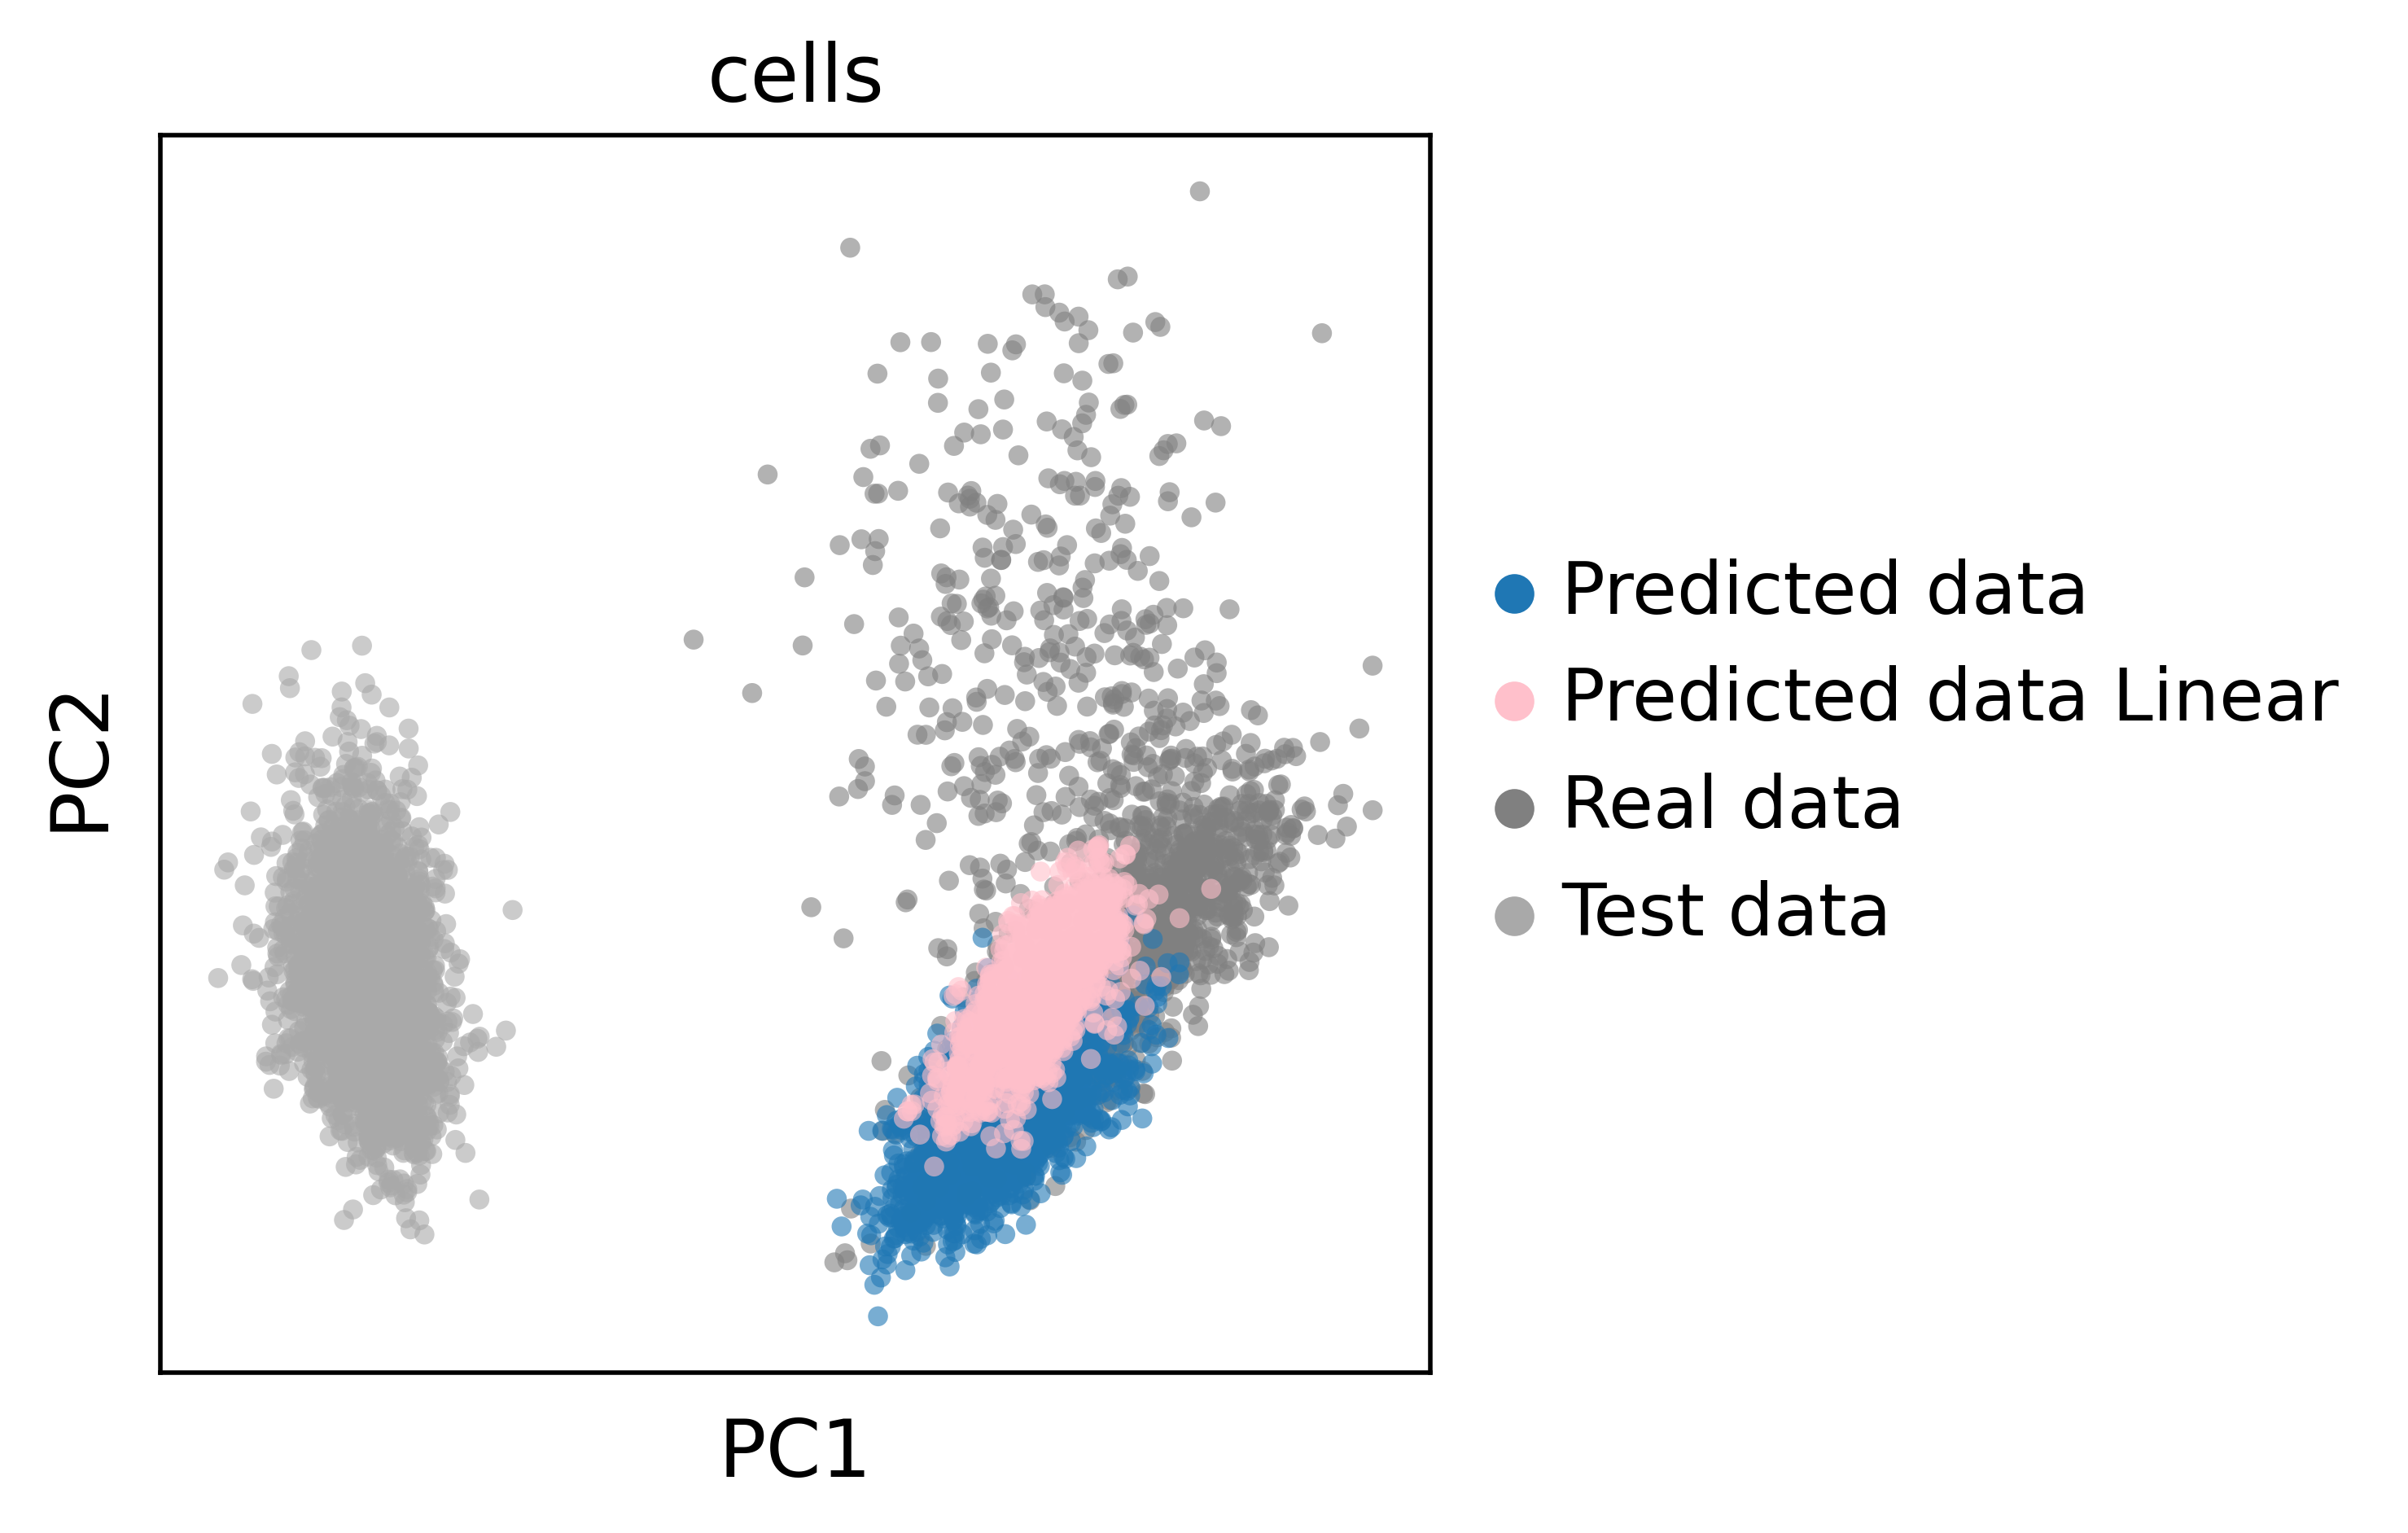

In [97]:
sc.pl.pca(adata_, color="cells",size=50,alpha = 0.6,palette=["#1f77b4","pink","grey","darkgrey"])

/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


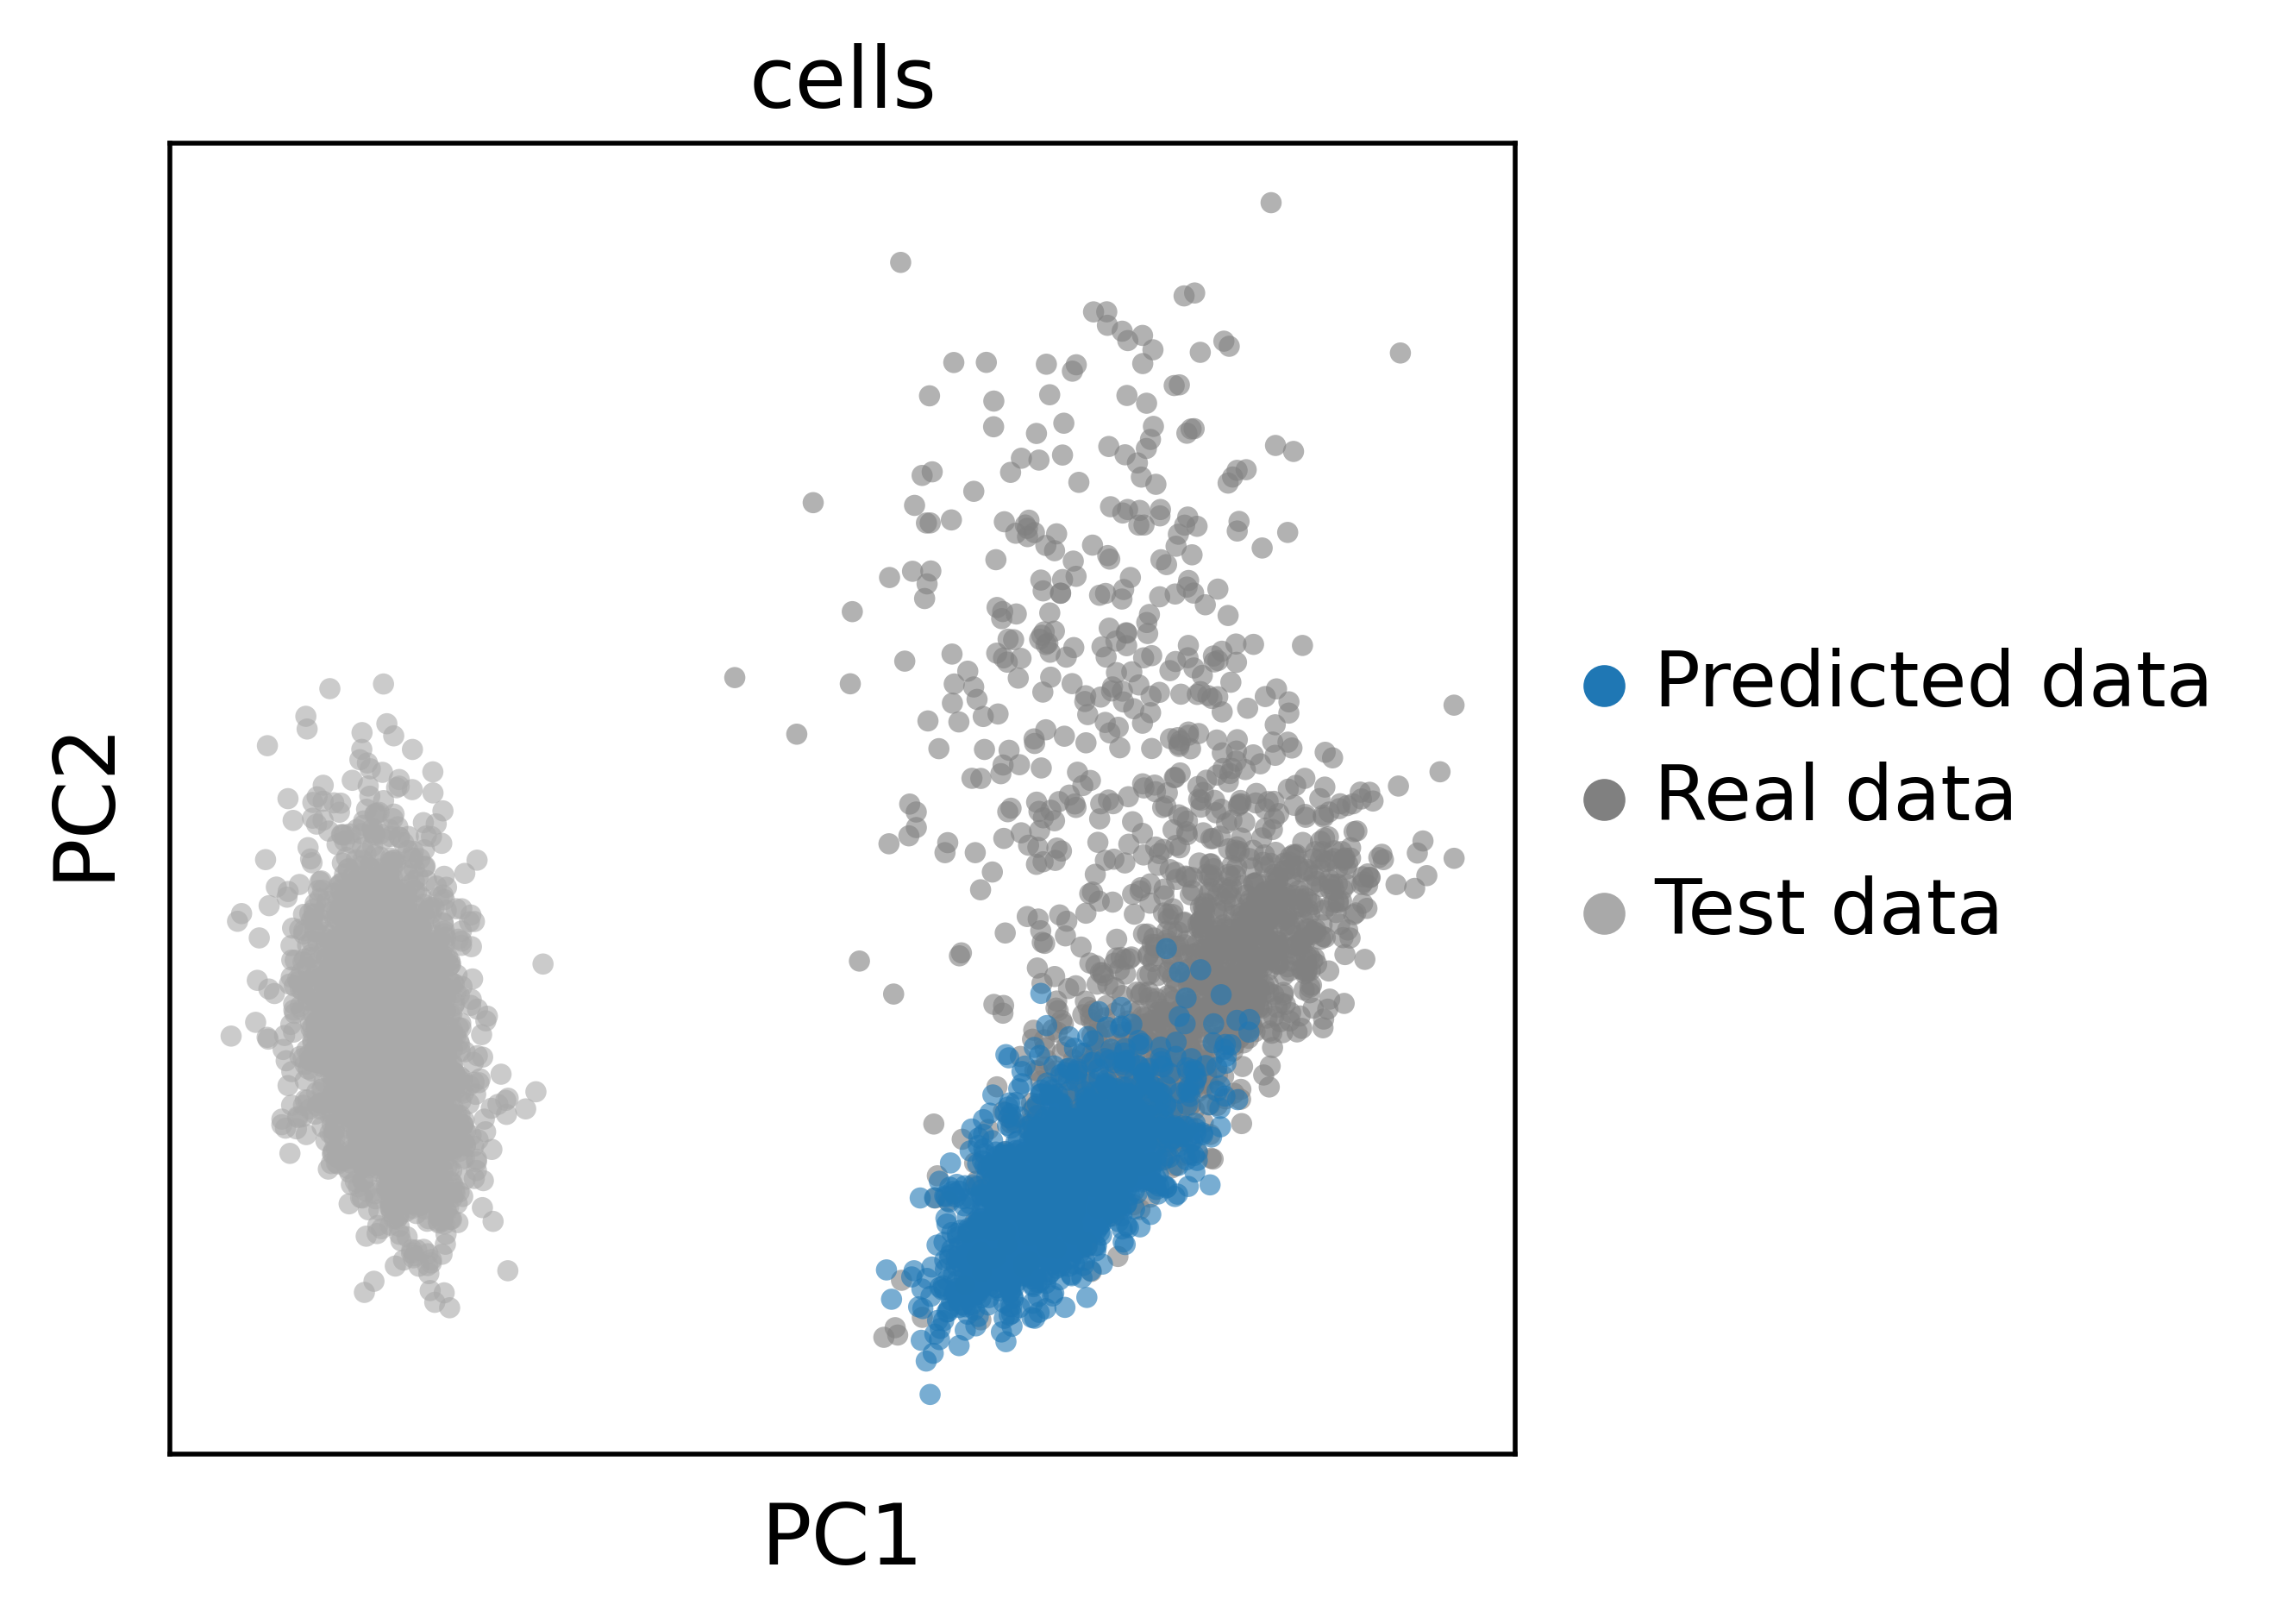

In [98]:
adata_trans = adata_[adata_.obs["cells"] != "Predicted data Linear"]
sc.pl.pca(adata_trans, color="cells",size=50,alpha = 0.6,palette=["#1f77b4","grey","darkgrey"])


/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


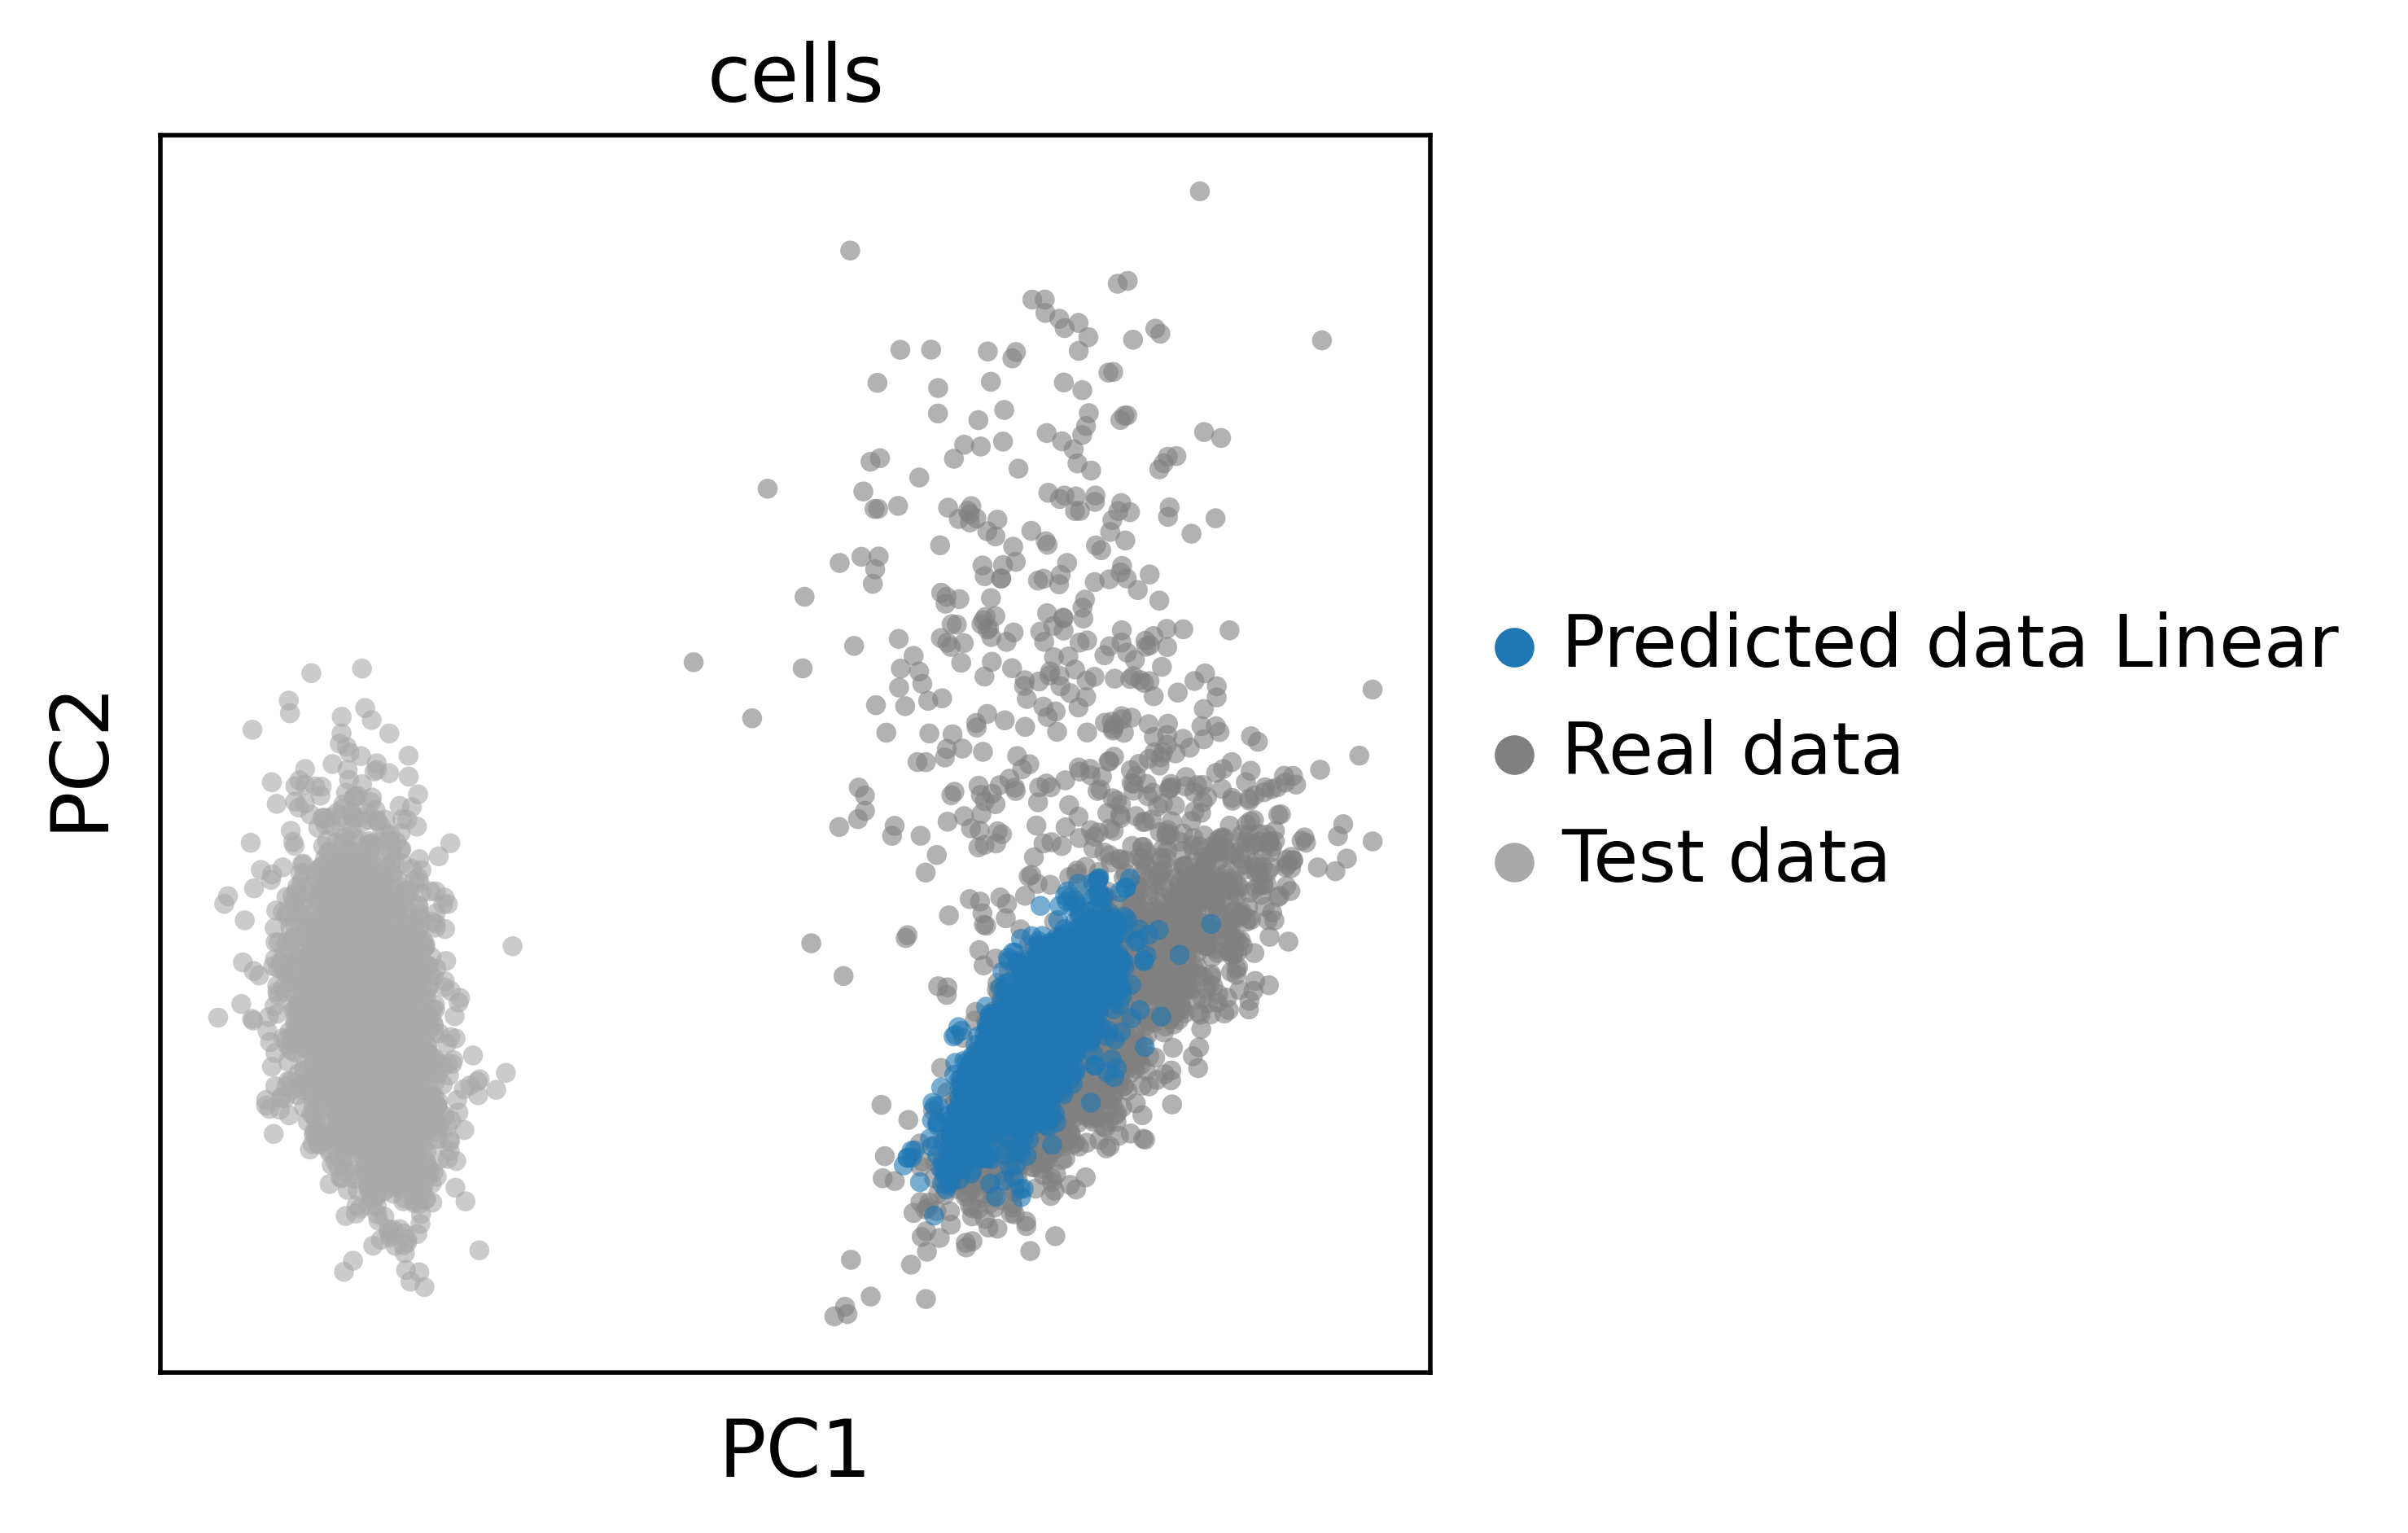

In [99]:
adata_final = adata_[adata_.obs["cells"] != "Predicted data"]
sc.pl.pca(adata_final, color="cells",size=50,alpha = 0.6,palette=["#1f77b4","grey","darkgrey"])


In [51]:
#adata_meso_endo_forward.X = expTransform(adata_meso_endo_forward.X)

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

pca_pal = ["#d62728","#ff7f0e","#1f77b4"]


def corrfunc(x, y, **kws):
	slope, intercept, r, p_value, _err = stats.linregress(x, y)
	ax = plt.gca()
	ax.annotate("$R^2$ = {:.2f}".format(r**2),
				xy=(.1, .9), xycoords=ax.transAxes)


def Plotting_Correlation_genes(data_object,title,scatter_color):
    real_data = data_object[data_object.obs["cells"] == "Real data",:]
    pred_data =  data_object[data_object.obs["cells"] == "Predicted data",:] 
    scanpy_obj_data = np.vstack((np.average(real_data.X,axis = 0),np.average(pred_data.X,axis = 0)))
    X = "Real data"
    Y = "Predicted data"
    scanpy_obj_data_df = pd.DataFrame(scanpy_obj_data.T,columns=[X,Y])
    corrfunc(scanpy_obj_data[0],scanpy_obj_data[1])
    ax = sns.regplot(data = scanpy_obj_data_df,x = X ,y = Y,scatter=True,scatter_kws={'s':10},marker = "o",color=scatter_color)
    major_ticks = np.arange(0, 100,20)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    #plt.xlim(0,80) 
    #plt.ylim(0,80)
    plt.grid(False)
    sns.despine(offset=5)
    plt.xlabel(X,fontsize = 20)
    plt.ylabel(Y,fontsize = 20)    
    plt.tick_params(labelsize=20)
    plt.title(title,fontsize = 20)   
    plt.show()
    
def Plotting_Correlation_var(data_object,title,scatter_color):
    real_data = data_object[data_object.obs["cells"] == "Real data",:]
    pred_data =  data_object[data_object.obs["cells"] == "Predicted data",:] 
    scanpy_obj_data = np.vstack((np.std(real_data.X,axis = 0),np.std(pred_data.X,axis = 0)))
    X = "Real data"
    Y = "Predicted data"
    scanpy_obj_data_df = pd.DataFrame(scanpy_obj_data.T,columns=[X,Y])
    corrfunc(scanpy_obj_data[0],scanpy_obj_data[1])
    ax = sns.regplot(data = scanpy_obj_data_df,x = X ,y = Y,scatter=True,scatter_kws={'s':10},marker = "o",color=scatter_color)
    major_ticks = np.arange(0, 40,5)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    sns.despine(offset=2)
    plt.xlim(-1,25) 
    plt.ylim(-1,25)
    plt.grid(False)
    plt.xlabel(X,fontsize = 20)
    plt.ylabel(Y,fontsize = 20)    
    plt.tick_params(labelsize=20)
    plt.title(title,fontsize = 20)
    plt.show()
    
def Plotting_Correlation_var_log(data_object,title,scatter_color):
    real_data = data_object[data_object.obs["cells"] == "Real data",:]
    pred_data =  data_object[data_object.obs["cells"] == "Predicted data",:] 
    scanpy_obj_data = np.vstack((np.std(real_data.X,axis = 0),np.std(pred_data.X,axis = 0)))
    X = "Real data"
    Y = "Predicted data"
    scanpy_obj_data_df = pd.DataFrame(scanpy_obj_data.T,columns=[X,Y])
    corrfunc(scanpy_obj_data[0],scanpy_obj_data[1])
    ax = sns.regplot(data = scanpy_obj_data_df,x = X ,y = Y,scatter=True,scatter_kws={'s':10},marker = "o",color=scatter_color)
    major_ticks = np.arange(0,1,0.2)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    plt.xlim(-0.1,1) 
    plt.ylim(-0.1,1)
    plt.grid(False)
    sns.despine(offset=5)
    plt.xlabel(X,fontsize = 20)
    plt.ylabel(Y,fontsize = 20)    
    plt.tick_params(labelsize=20)
    plt.title(title,fontsize = 20)   
    plt.show() 
    
def Plotting_Correlation_genes_log(data_object,title,scatter_color):
    real_data = data_object[data_object.obs["cells"] == "Real data",:]
    pred_data =  data_object[data_object.obs["cells"] == "Predicted data",:] 
    scanpy_obj_data = np.vstack((np.average(real_data.X,axis = 0),np.average(pred_data.X,axis = 0)))
    X = "Real data"
    Y = "Predicted data"
    scanpy_obj_data_df = pd.DataFrame(scanpy_obj_data.T,columns=[X,Y])
    corrfunc(scanpy_obj_data[0],scanpy_obj_data[1])
    ax = sns.regplot(data = scanpy_obj_data_df,x = X ,y = Y,scatter=True,scatter_kws={'s':10},marker = "o",color=scatter_color)
    major_ticks = np.arange(0,5,2)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    plt.xlim(0,5) 
    plt.ylim(0,5)
    plt.grid(False)
    sns.despine(offset=5)
    plt.xlabel(X,fontsize = 20)
    plt.ylabel(Y,fontsize = 20)    
    plt.tick_params(labelsize=20)
    plt.title(title,fontsize = 20)   
    plt.show()    

In [53]:
#Plotting_Correlation_genes_log(adata_meso_endo_forward," ",pca_pal[2])
#Plotting_Correlation_var_log(adata_meso_endo_forward," ",pca_pal[2])


In [54]:
#def expTransform(X):
#    return np.exp(X)-1

In [55]:
#adata_meso_endo_forward.X = expTransform(adata_meso_endo_forward.X)

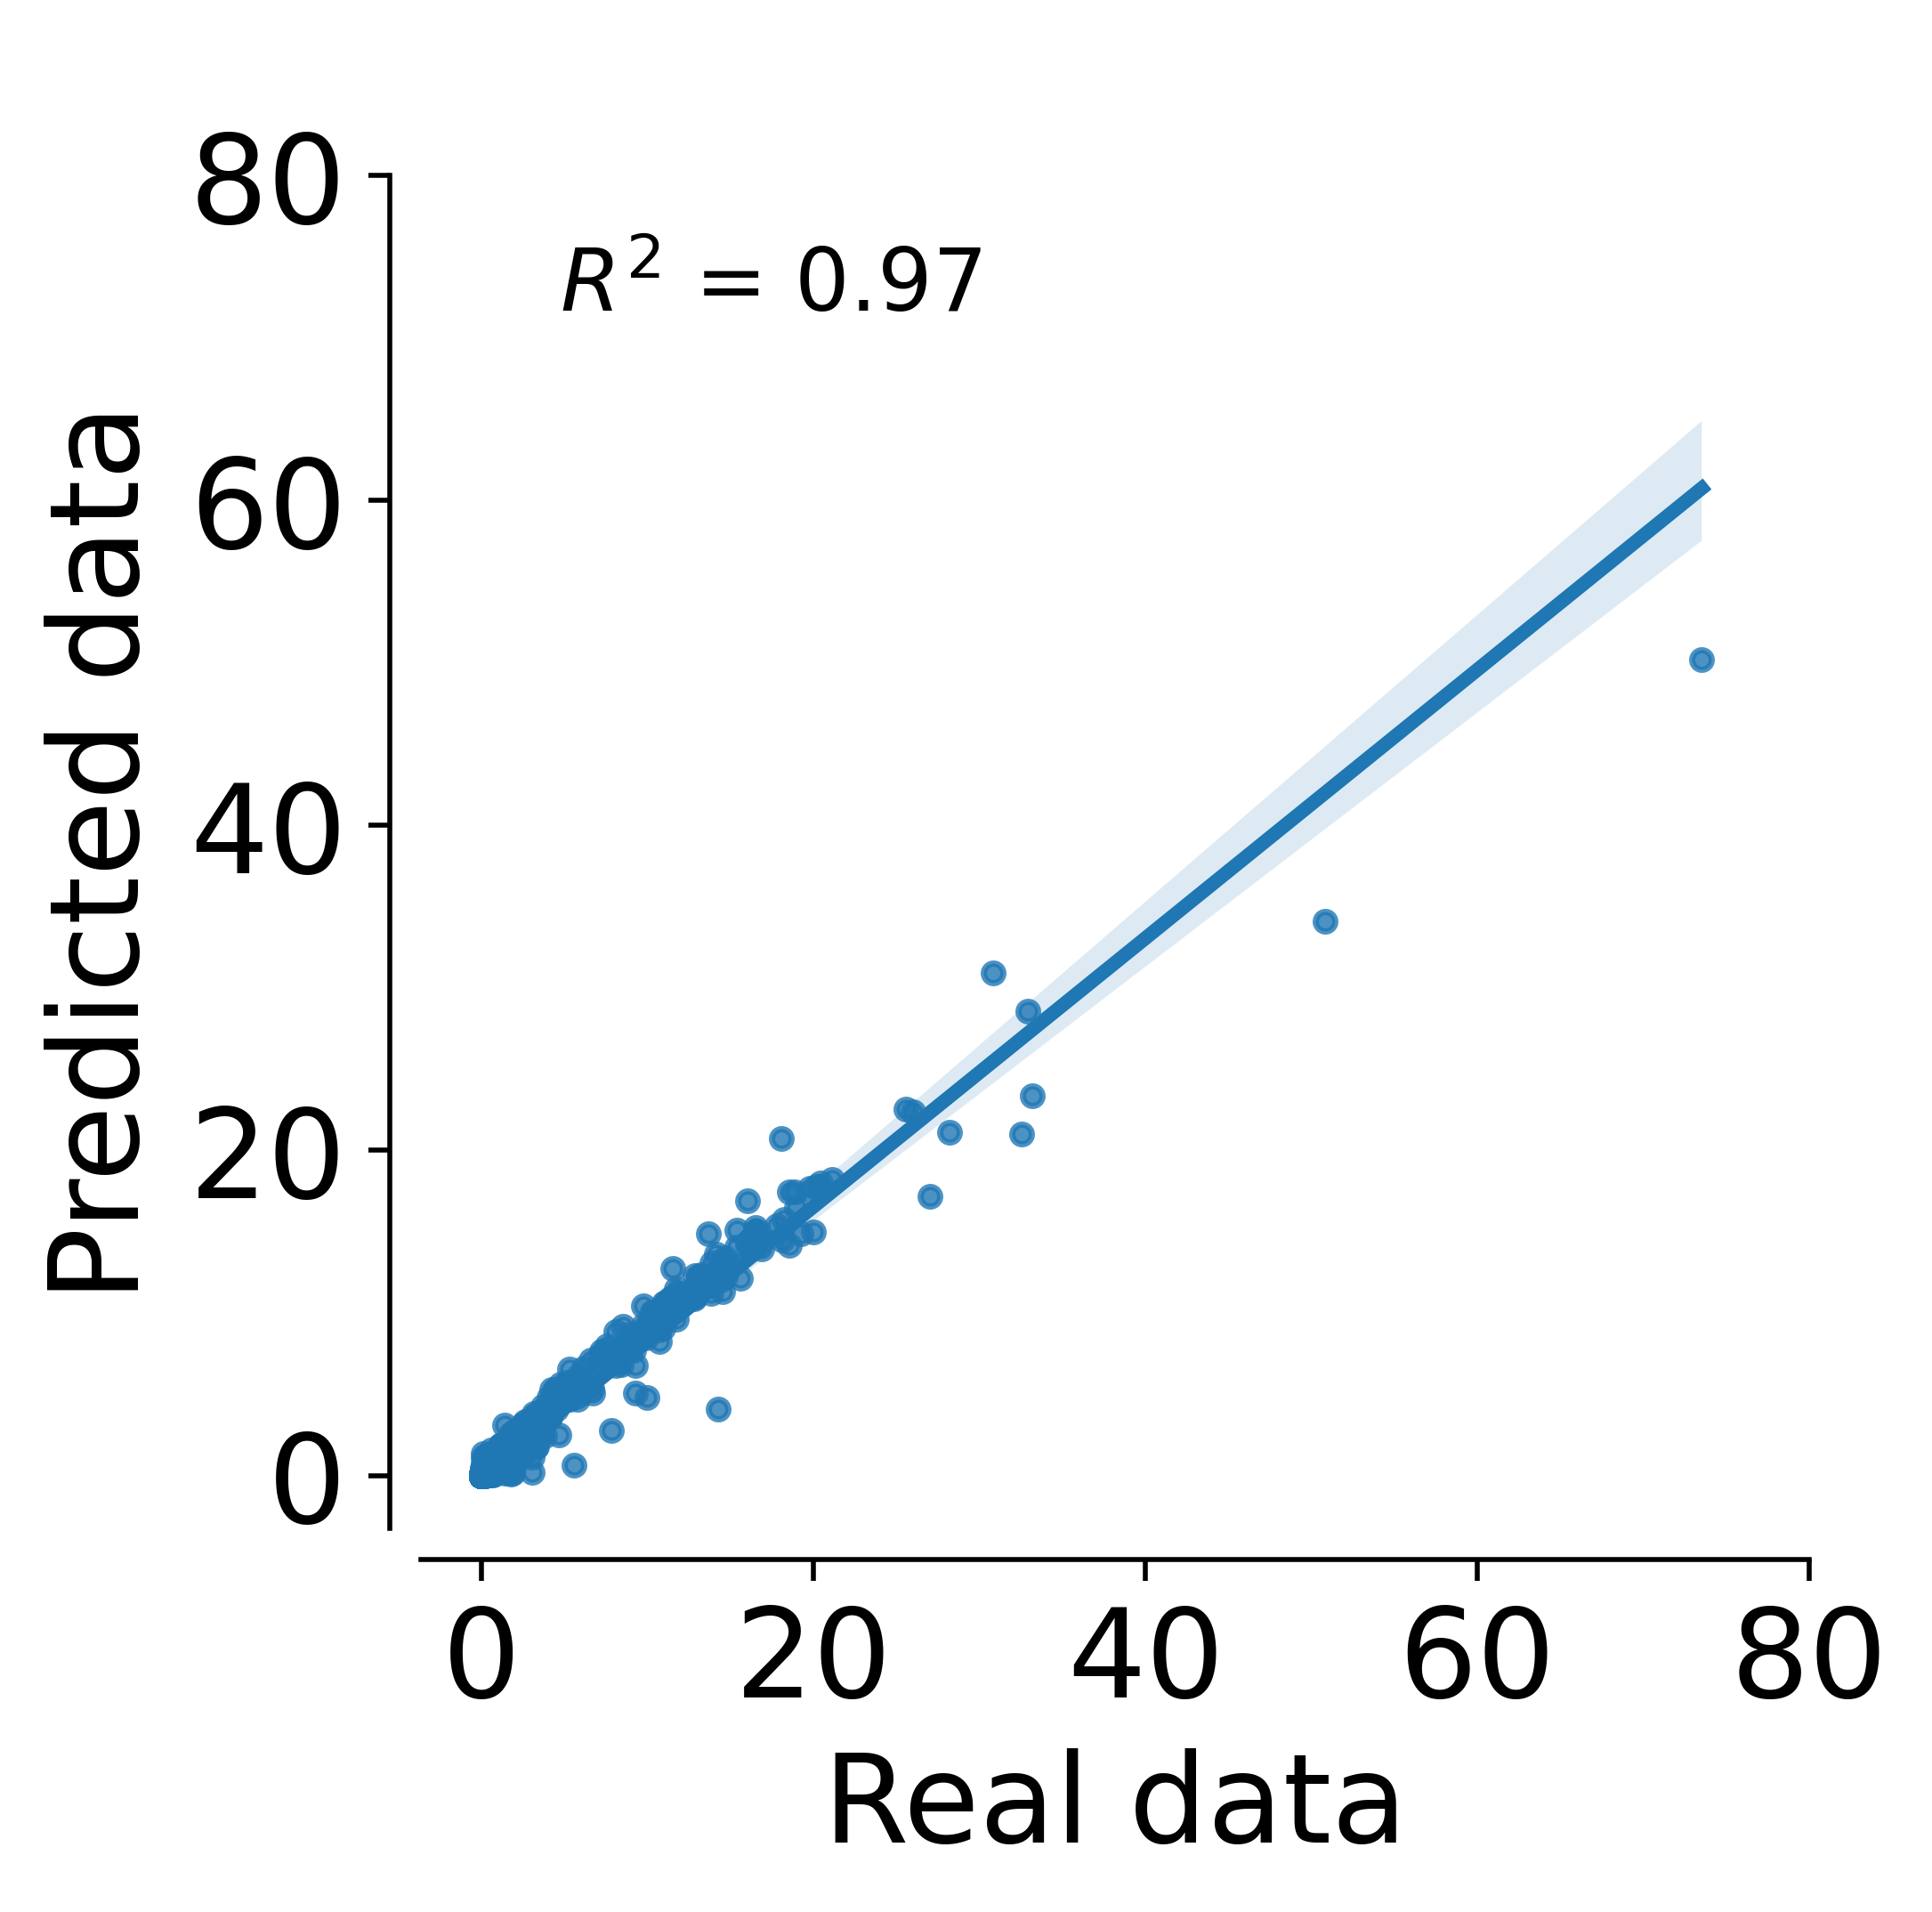

In [56]:
Plotting_Correlation_genes(adata_meso_endo_forward," ",pca_pal[2])


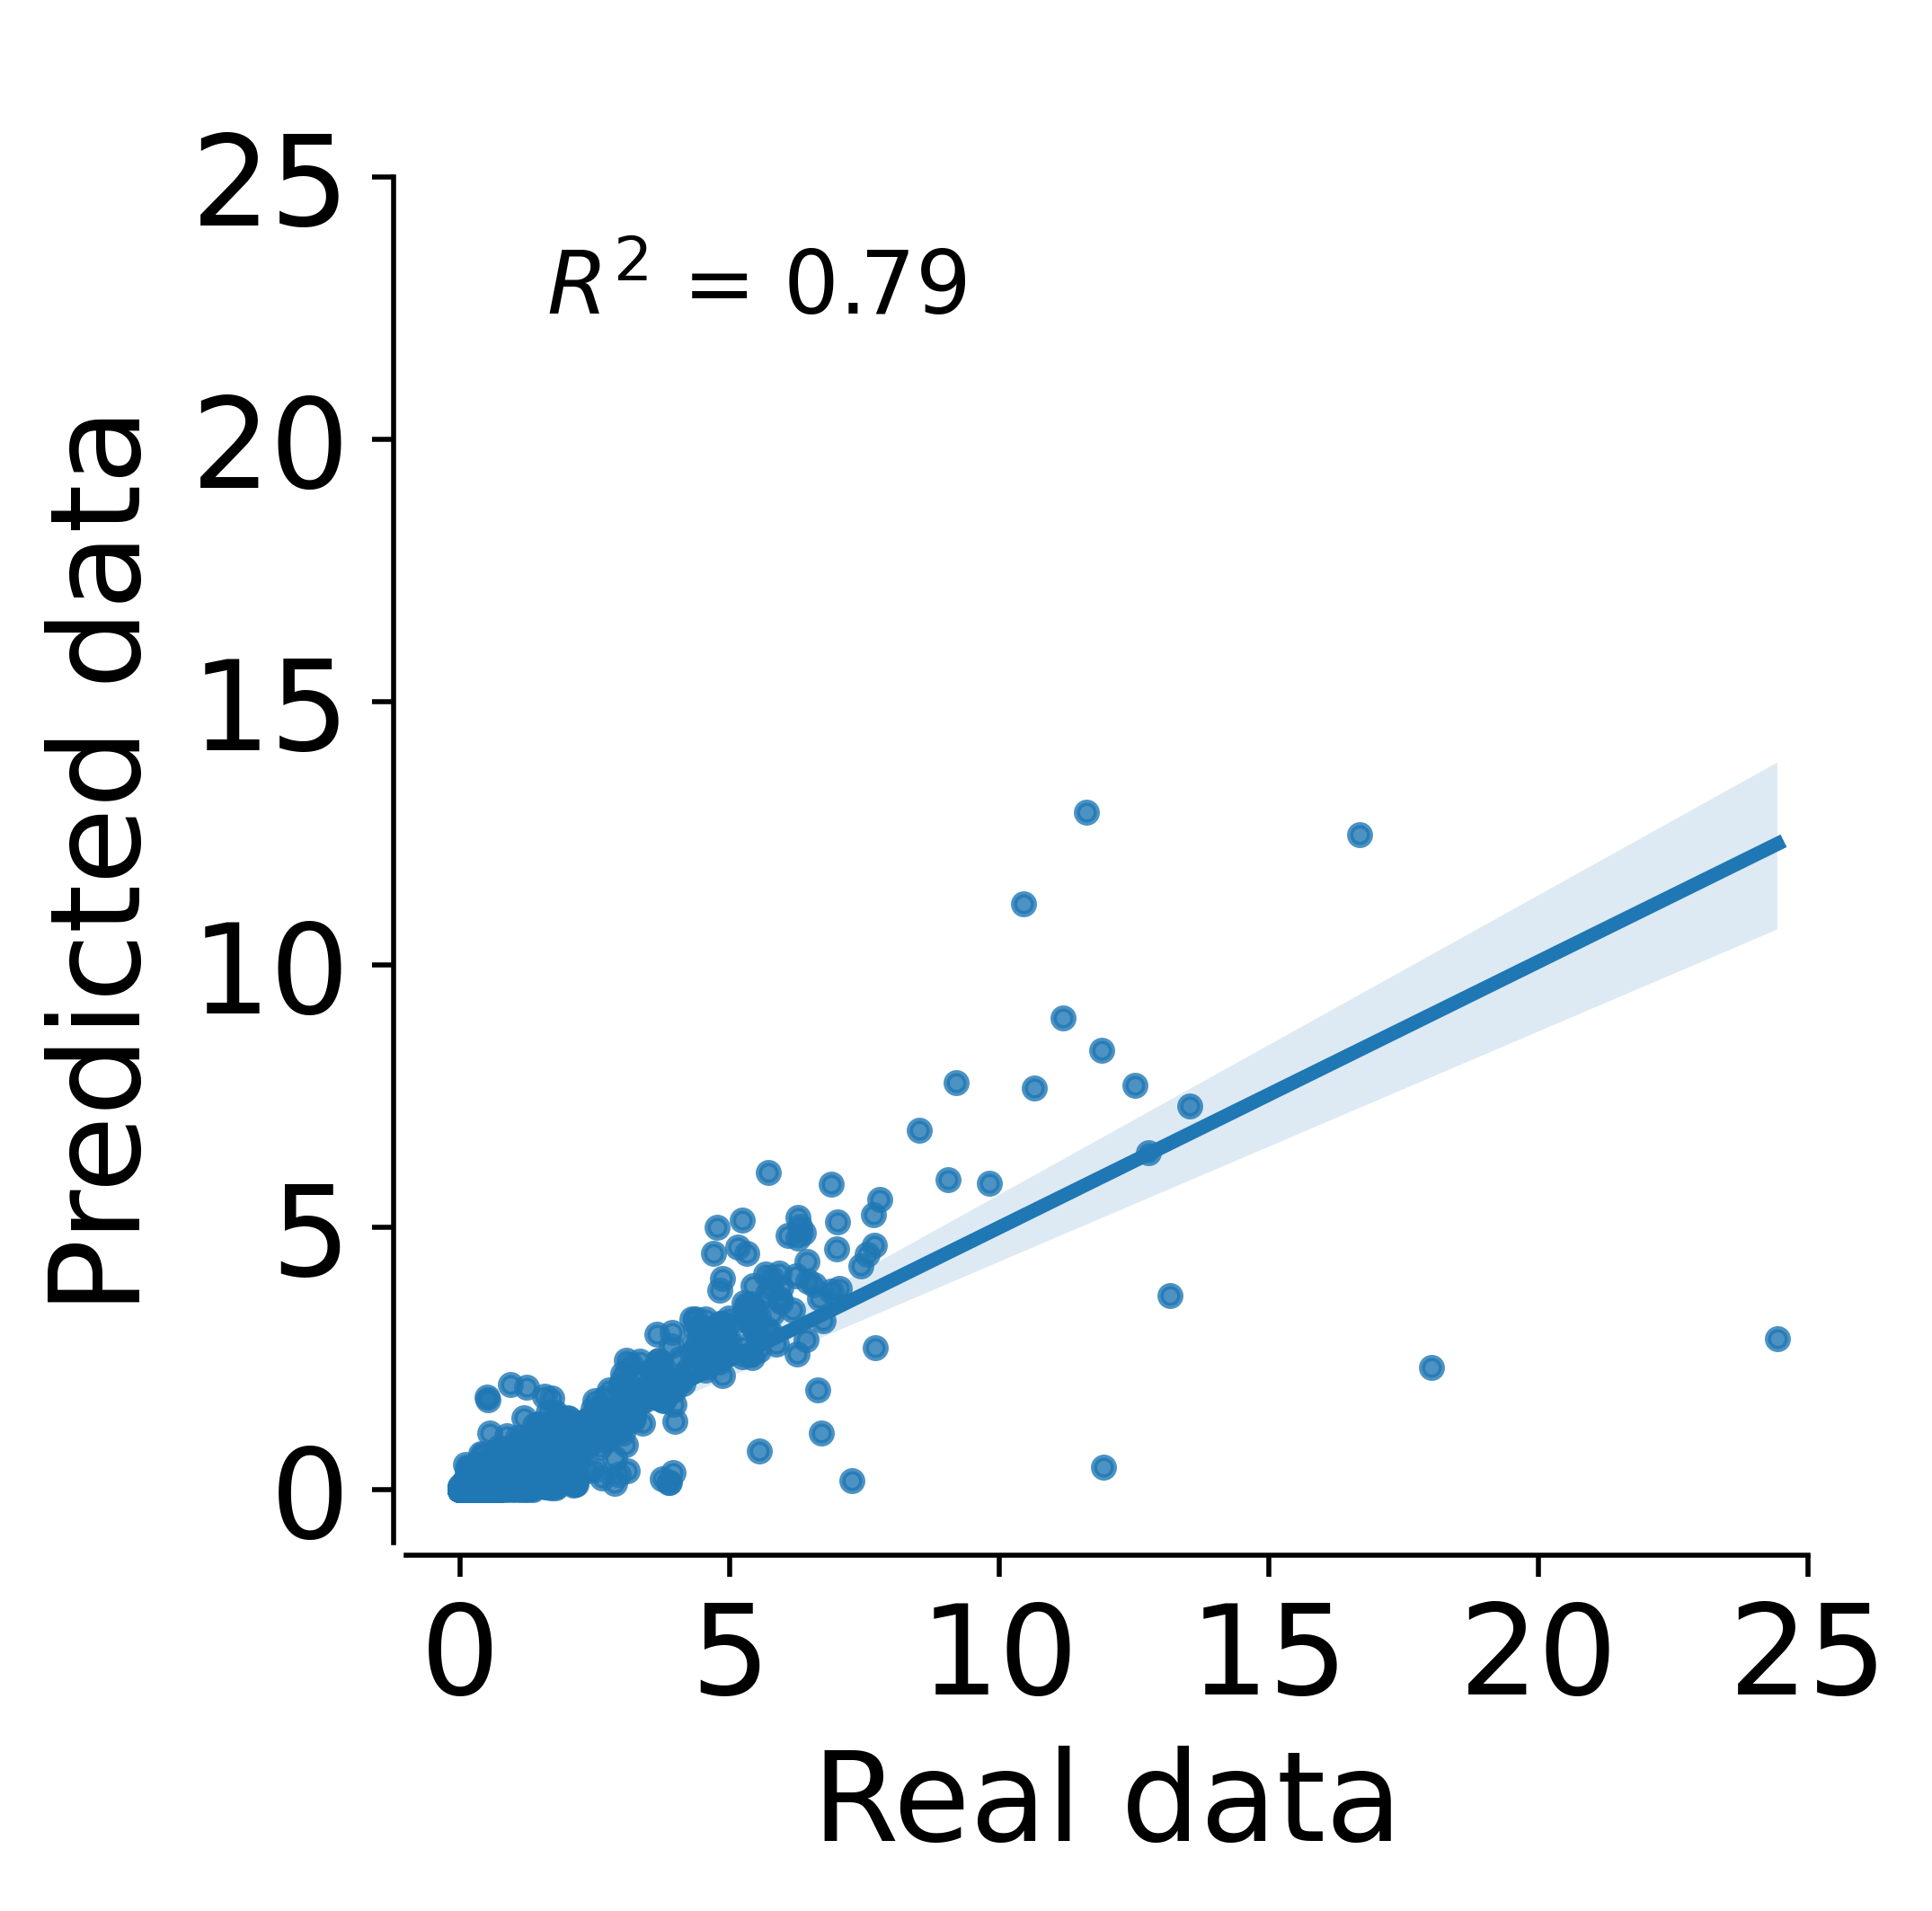

In [57]:
Plotting_Correlation_var(adata_meso_endo_forward," ",pca_pal[2])


In [58]:
def Calculating_PCA(data_object):
	sc.tl.pca(data_object)
    
pca_pal_ = ["#1f77b4","grey","darkgrey"]


In [59]:
Calculating_PCA(adata_meso_endo_forward)


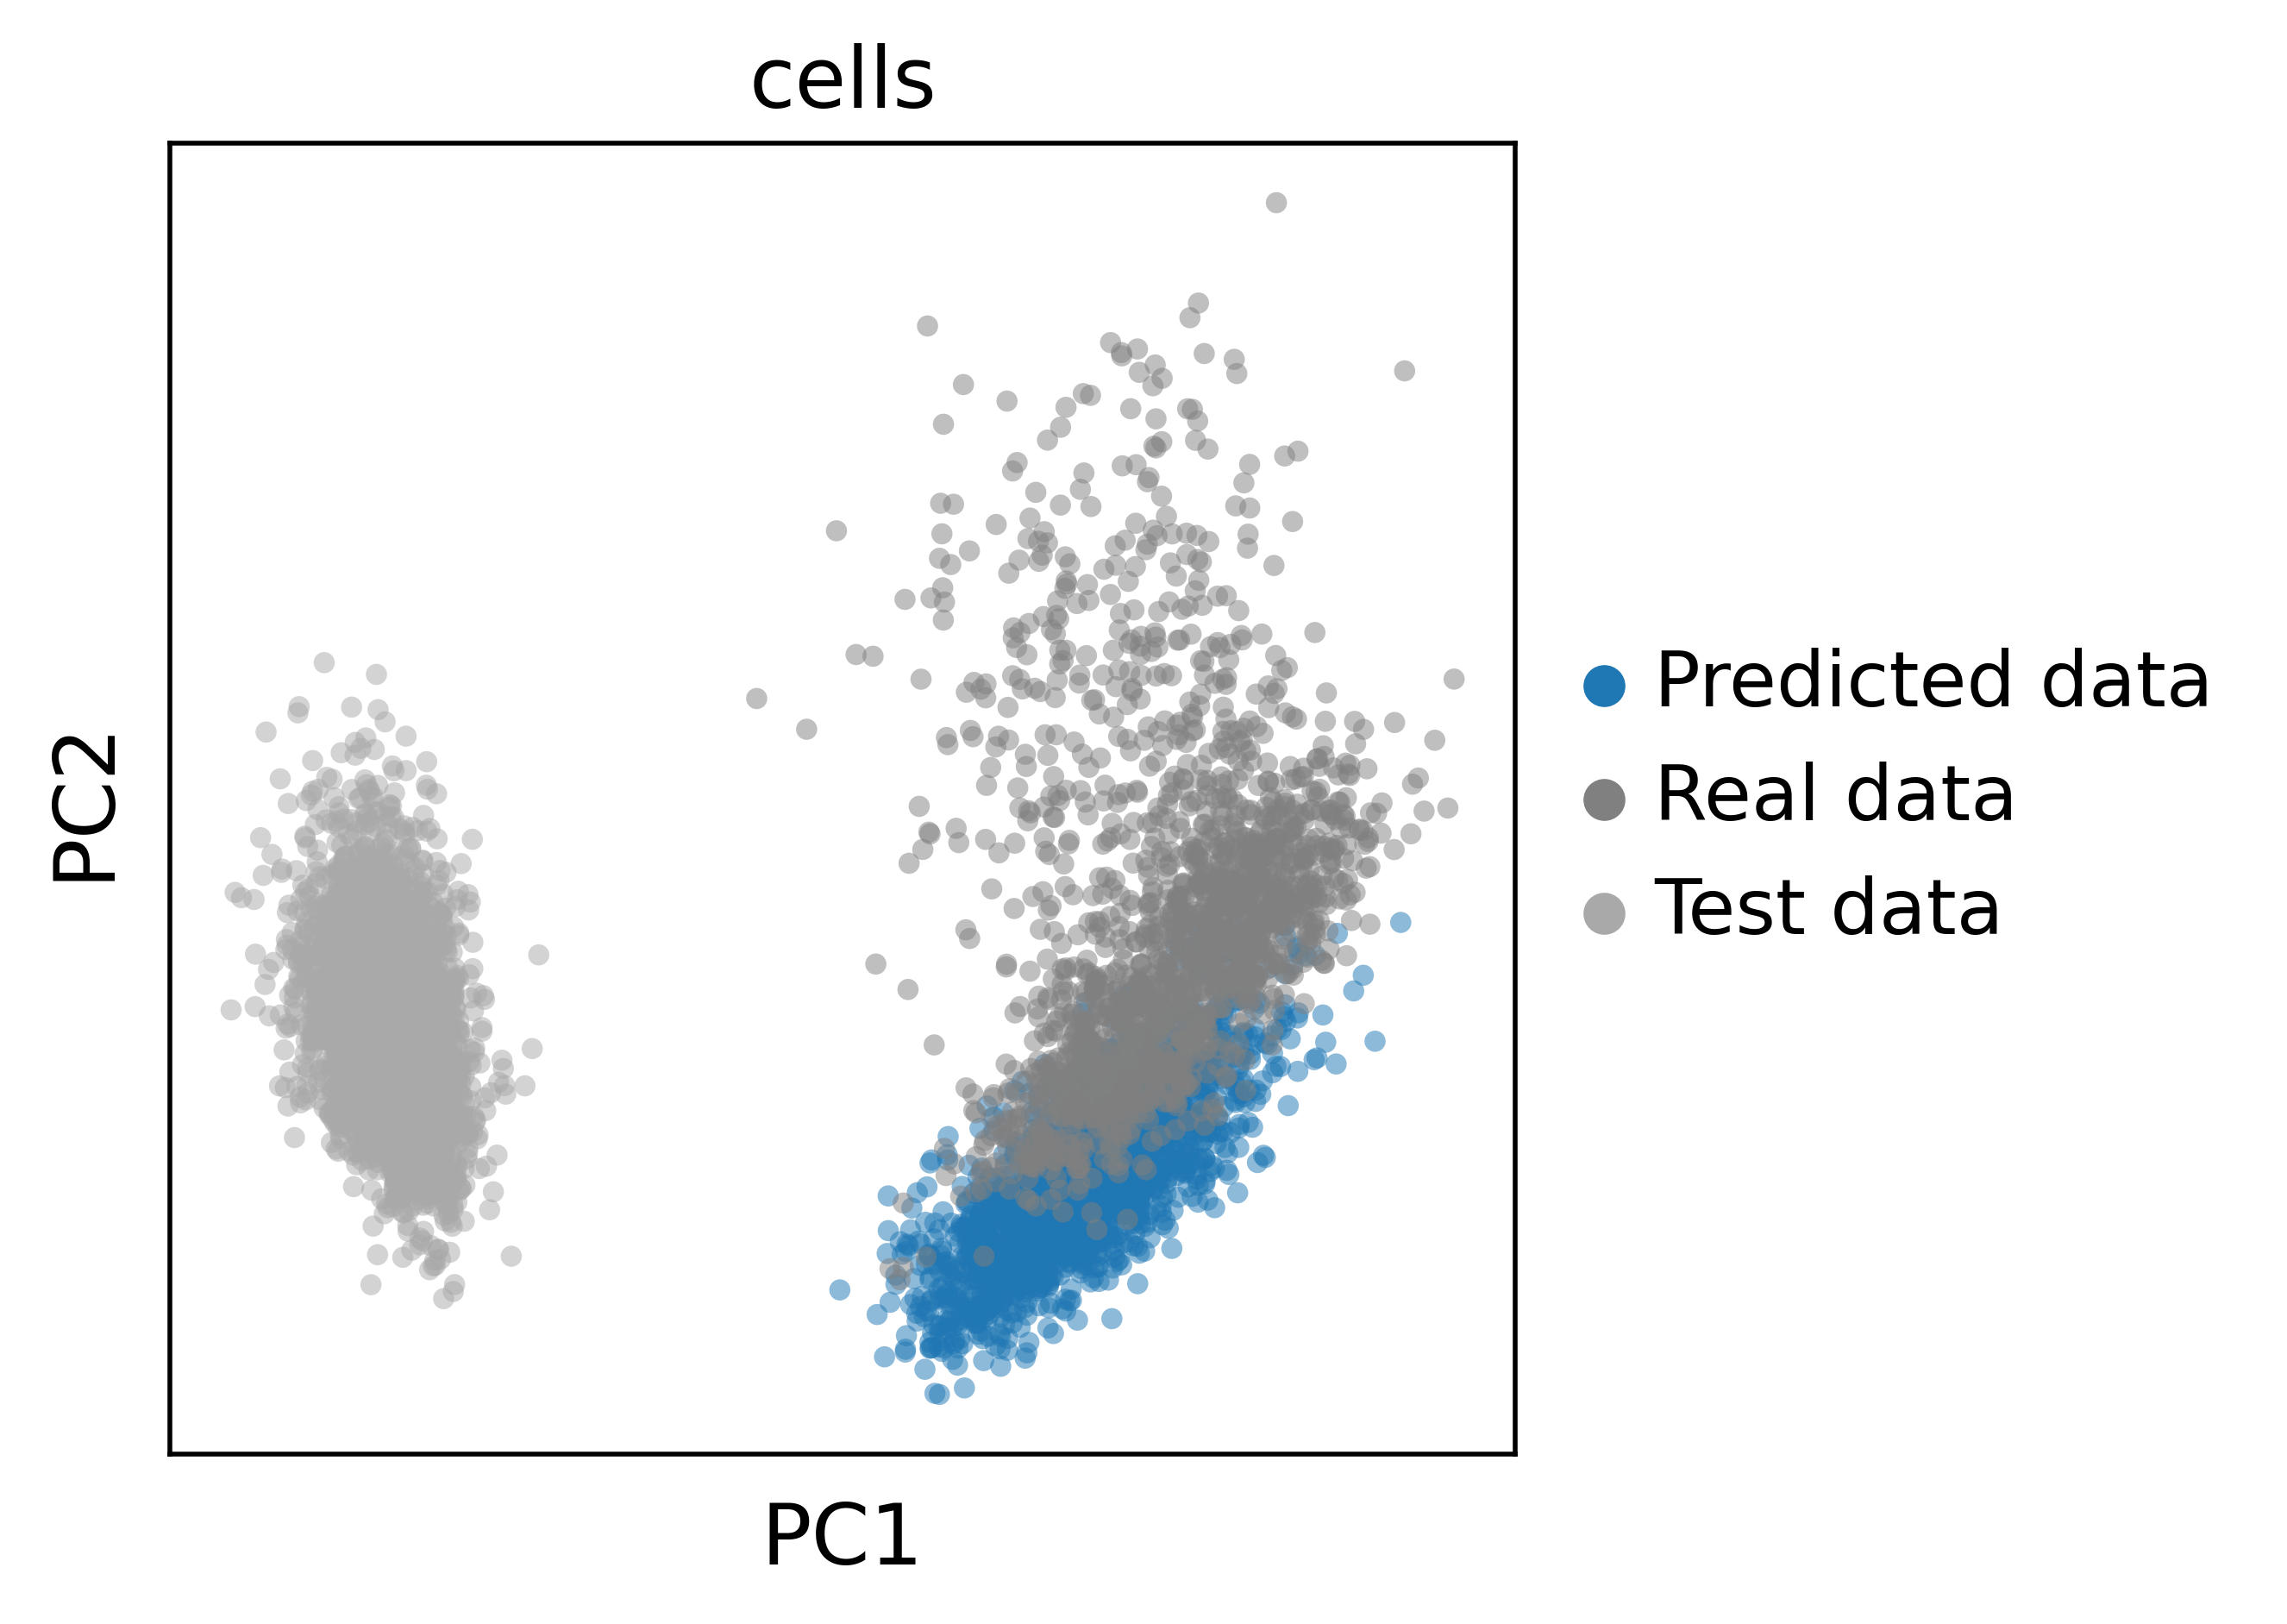

In [60]:
sc.pl.pca(adata_meso_endo_forward, color="cells",size=50,alpha = 0.5,palette=pca_pal_)

In [151]:
C_mean,C_var,M_mean,M_var = zebra_obj.Simulations(adata_test,5.3,12,"HPF")

/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In 

/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In 

/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In 

In [152]:
adata_meso_endo_forward.uns["mean_correlations"] = C_mean
adata_meso_endo_forward.uns["std_correlations"] = C_var
adata_meso_endo_forward.uns["mean_slope"] = M_mean
adata_meso_endo_forward.uns["std_slope"] = M_var

In [153]:
adata_meso_endo_forward.write_h5ad("/home/gaurav/Gaurav/Berlin/Deep_Learning/Project/models/NB_MMD/Objects/Zebrafish/adata_ecto_forward_12hpf.h5ad")